In [10]:
#constants: SciPy offers a set of mathematical constants, one of them is liter which returns 1 liter as cubic meters.
import scipy

print(scipy.__version__)

1.9.2


In [11]:
from scipy import constants

print(constants.liter)

0.001


In [12]:
from scipy import constants

print(constants.pi)

3.141592653589793


In [13]:
from scipy import constants

print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_codata', '_constants', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', '

# Roots of an Equation

In [14]:
#NumPy is capable of finding roots for polynomials and linear equations, but it can not find roots for non linear equations

from scipy.optimize import root
from math import cos

def eqn(x):
  return x + cos(x)

myroot = root(eqn, 0)

print(myroot.x)

[-0.73908513]


# Minimizing a Function

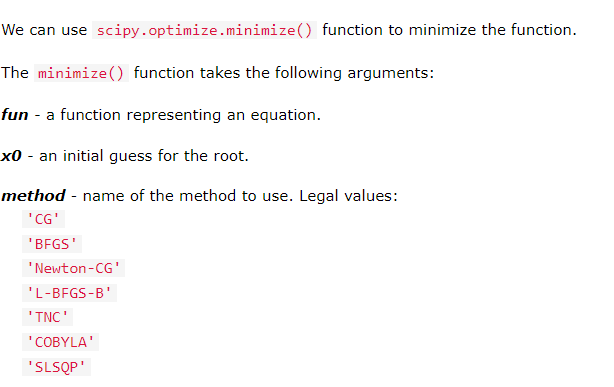

In [15]:
from scipy.optimize import minimize

def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(mymin)

      fun: 1.75
 hess_inv: array([[0.50000001]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-0.50000001])


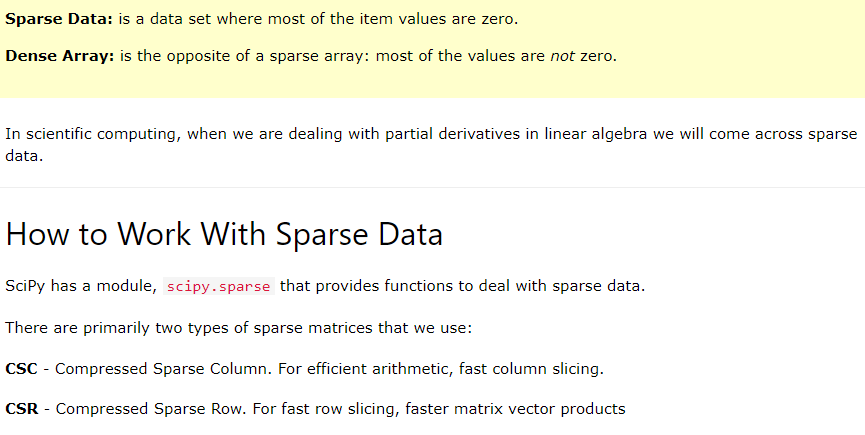

In [16]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


In [17]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).data)

[1 1 2]


In [18]:
print(csr_matrix(arr).count_nonzero())

3


In [24]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [28]:
#Eliminating duplicates by adding them:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])


mat.sum_duplicates()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [29]:
#Converting from csr to csc with the tocsc() method:

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


# SciPy Graphs

In [15]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0]))


In [16]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0]))


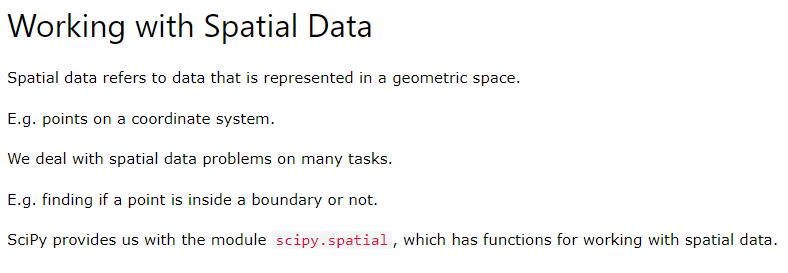

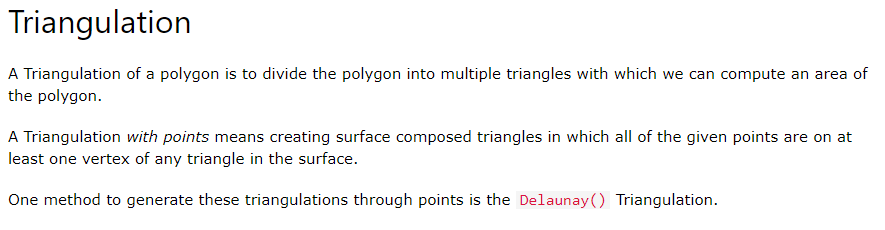

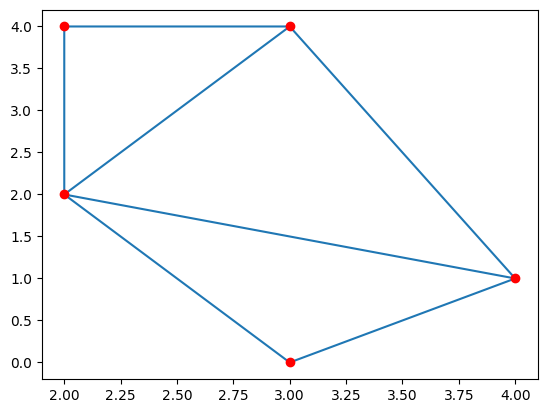

In [31]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

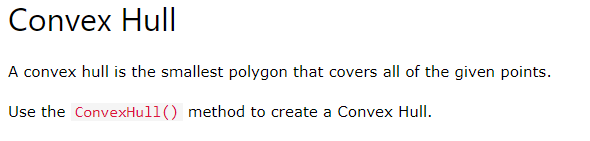

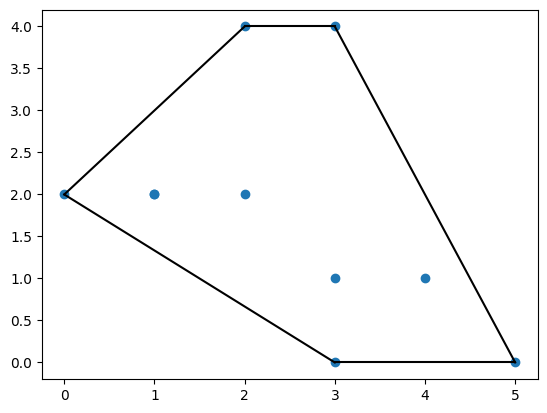

In [18]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

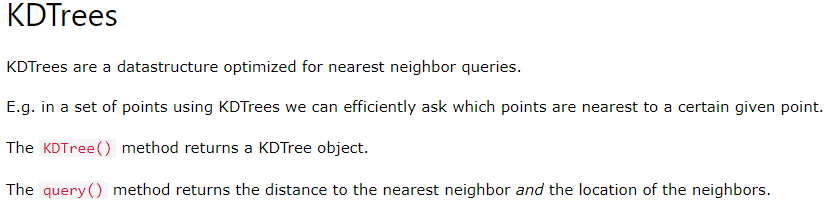

In [22]:
#Find the nearest neighbor to point (1,1):
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1),k=2)

print(res)

(array([2.        , 2.23606798]), array([0, 1], dtype=int64))


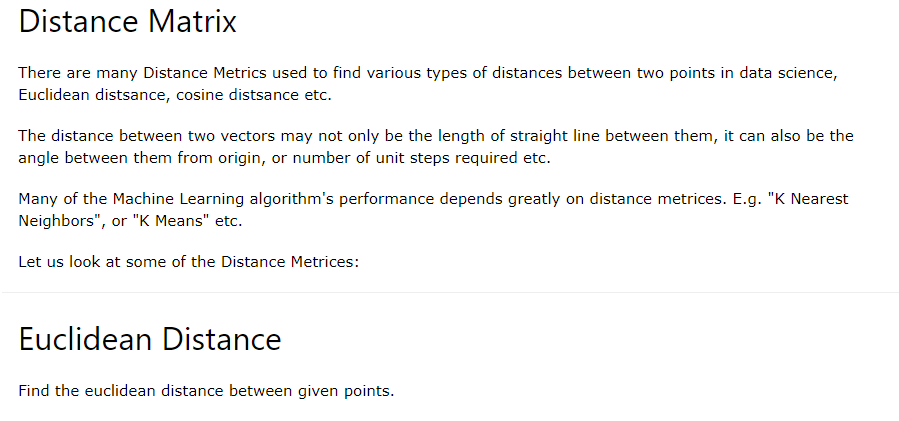

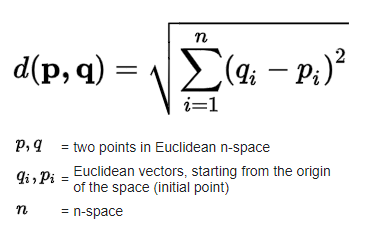

In [2]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)

9.219544457292887


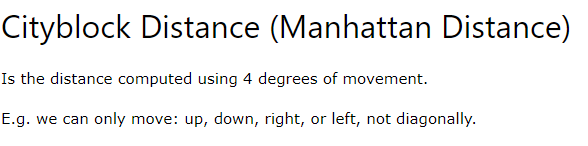

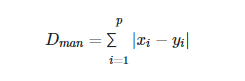

In [3]:
from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

res = cityblock(p1, p2)

print(res)

11


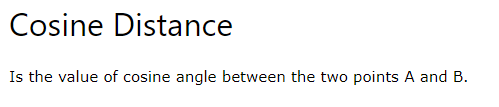

In [4]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

print(res)

0.019419324309079777


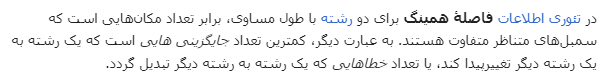

# Hamming Distance 

In [32]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)

0.6666666666666666


# SciPy Matlab Arrays


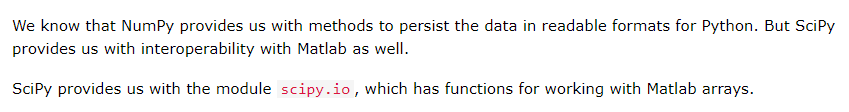

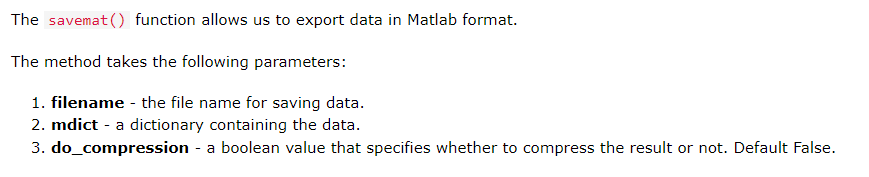

In [34]:
from scipy import io 
import numpy as np

arr=np.arange(10)
io.savemat('arr.mat',{"vec":arr})


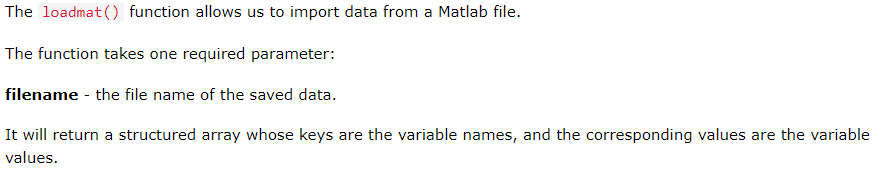

In [35]:
from scipy import io
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

# Export:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat')

print(mydata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Nov 17 18:38:31 2022', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


In [36]:
#Use the variable name "vec" to display only the array from the matlab data:

In [37]:
print(mydata['vec'])

[[0 1 2 3 4 5 6 7 8 9]]


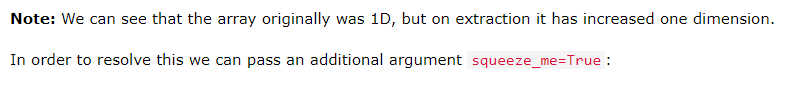

In [38]:
# Import:
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


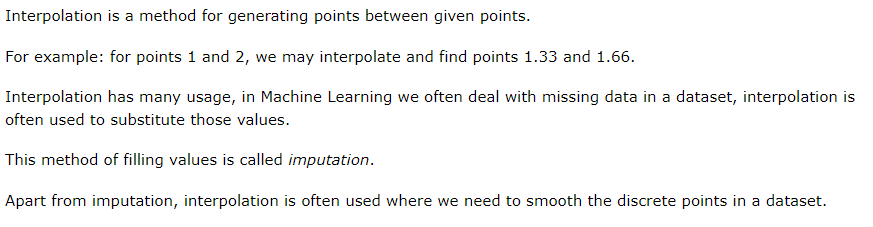

In [39]:
#For given xs and ys interpolate values from 2.1, 2.2... to 2.9:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2*xs + 1

print(xs,ys)

[0 1 2 3 4 5 6 7 8 9] [ 1  3  5  7  9 11 13 15 17 19]


In [53]:
interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


# Spline Interpolation

In [54]:
#Find univariate spline interpolation for 2.1, 2.2... 2.9 for the following non linear points:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]
